In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Input the filename
train=pd.read_csv('train.csv',index_col=0)


In [3]:
#Function to describe input data
def describe_data(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
    print("Null Values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))



In [4]:
describe_data(train)

Data Types:
TITLE                   object
ABSTRACT                object
Computer Science         int64
Physics                  int64
Mathematics              int64
Statistics               int64
Quantitative Biology     int64
Quantitative Finance     int64
dtype: object
Rows and Columns:
(20972, 8)
Column Names:
Index(['TITLE', 'ABSTRACT', 'Computer Science', 'Physics', 'Mathematics',
       'Statistics', 'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')
Null Values:
TITLE                   0.0
ABSTRACT                0.0
Computer Science        0.0
Physics                 0.0
Mathematics             0.0
Statistics              0.0
Quantitative Biology    0.0
Quantitative Finance    0.0
dtype: float64


In [5]:
#Consider the input values for X and y
X=train['TITLE']
y=train['Quantitative Finance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
#Convert the text into vector form
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b', lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [7]:
#Calculate the Word_freq count
word_freq_df = pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names())

top_words_df = pd.DataFrame(word_freq_df.sum()).sort_values(0, ascending=False)
print(top_words_df)

                   0
learning        1269
networks         964
using            890
based            818
model            711
...              ...
intracranial       1
intramolecular     1
intranet           1
intriguing         1
zynq               1

[16738 rows x 1 columns]


In [8]:
#Training the model
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_cv, y_train)
predictions = naive_bayes.predict(X_test_cv)

In [9]:
#Accuracy and Classification report
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report
print('Accuracy score: ', accuracy_score(y_test, predictions))
print('Precision score: ', precision_score(y_test, predictions))
print('Classification_report',classification_report(y_test,predictions))
print('Recall score: ', recall_score(y_test, predictions))

Accuracy score:  0.9876042908224076
Precision score:  0.75
Classification_report               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4141
           1       0.75      0.06      0.10        54

    accuracy                           0.99      4195
   macro avg       0.87      0.53      0.55      4195
weighted avg       0.98      0.99      0.98      4195

Recall score:  0.05555555555555555


Text(91.68, 0.5, 'predicted label')

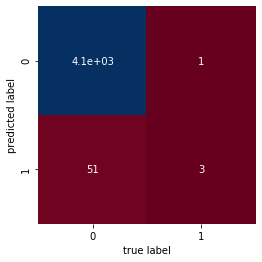

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('true label')
plt.ylabel('predicted label')

In [11]:
testing_predictions = []
for i in range(len(X_test)):
    if predictions[i] == 1:
        testing_predictions.append('1')
    else:
        testing_predictions.append('0')
check_df = pd.DataFrame({'actual_label': list(y_test), 'prediction': testing_predictions, 'TITLE':list(X_test)})


In [12]:
check_df

,actual_label,prediction,TITLE
0,0,0,Singing Style Transfer Using Cycle-Consistent ...
1,0,0,Bayesian Nonparametric Inference for M/G/1 Que...
2,0,0,Controllability of Conjunctive Boolean Network...
3,0,0,Marginally compact fractal trees with semiflex...
4,0,0,Phase diagram of a generalized off-diagonal Au...
...,...,...,...
4190,0,0,Phase locking the spin precession in a storage...
4191,0,0,Parametric Inference for Discretely Observed S...
4192,0,0,A Statistical Approach to Increase Classificat...
4193,0,0,Static Free Space Detection with Laser Scanner...


In [13]:
#import the model in form of pickle
import pickle
with open('text_classifier', 'wb') as picklefile:
    pickle.dump(naive_bayes,picklefile)

In [14]:
#Load the model
with open('text_classifier', 'rb') as training_model:
    model = pickle.load(training_model)

In [15]:
#input the test file for prediction
test=pd.read_csv('n5.csv',error_bad_lines=False,skipinitialspace=False)
test

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...,0,0,1,1,0
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...,0,1,0,0,0
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...,1,0,0,0,0
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...,0,1,0,0,0
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...,1,0,0,0,0
...,...,...,...,...,...,...,...,...
8984,29957,Supporting mixed-datatype matrix multiplicatio...,We approach the problem of implementing mixe...,1,0,0,0,0
8985,29958,An axiomatic basis for Blackwell optimality,In the theory of Markov decision processes (...,0,0,1,0,0
8986,29959,GeneVis - An interactive visualization tool fo...,GeneVis is a web-based tool to visualize com...,1,0,0,1,0
8987,29960,Quantifying the causal effect of speed cameras...,This paper quantifies the effect of speed ca...,1,0,0,1,0


In [16]:
label=test['TITLE']

In [17]:
len(label)

8989

In [18]:
#transform the text into label
new_test = cv.transform(label)

In [19]:
new_test

<8989x16738 sparse matrix of type '<class 'numpy.int64'>'
	with 62150 stored elements in Compressed Sparse Row format>

In [20]:
predictions2=model.predict(new_test)

In [21]:
testing_predictions2 = []
for i in range(len(label)):
    check_df2 = pd.DataFrame({'Quantitative Finance':predictions2})
  


In [22]:
check_df2

,Quantitative Finance
0,0
1,0
2,0
3,0
4,0
...,...
8984,0
8985,0
8986,0
8987,0


In [23]:
test = test.set_index(check_df2.index)

In [24]:
test['Quantitative Finance']=check_df2
test

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...,0,0,1,1,0,0
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...,0,1,0,0,0,0
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...,1,0,0,0,0,0
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...,0,1,0,0,0,0
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8984,29957,Supporting mixed-datatype matrix multiplicatio...,We approach the problem of implementing mixe...,1,0,0,0,0,0
8985,29958,An axiomatic basis for Blackwell optimality,In the theory of Markov decision processes (...,0,0,1,0,0,0
8986,29959,GeneVis - An interactive visualization tool fo...,GeneVis is a web-based tool to visualize com...,1,0,0,1,0,0
8987,29960,Quantifying the causal effect of speed cameras...,This paper quantifies the effect of speed ca...,1,0,0,1,0,0


In [25]:
test.to_csv('Submission.csv',index=False)

In [26]:
df=pd.read_csv('Submission.csv',index_col=0)
df

,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
ID,,,,,,,,
20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...,0,0,1,1,0,0
20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...,0,1,0,0,0,0
20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...,1,0,0,0,0,0
20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...,0,1,0,0,0,0
20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
29957,Supporting mixed-datatype matrix multiplicatio...,We approach the problem of implementing mixe...,1,0,0,0,0,0
29958,An axiomatic basis for Blackwell optimality,In the theory of Markov decision processes (...,0,0,1,0,0,0
29959,GeneVis - An interactive visualization tool fo...,GeneVis is a web-based tool to visualize com...,1,0,0,1,0,0


In [27]:
df=df.drop(['TITLE','ABSTRACT'],axis=1)
df

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
ID,,,,,,
20973,0,0,1,1,0,0
20974,0,1,0,0,0,0
20975,1,0,0,0,0,0
20976,0,1,0,0,0,0
20977,1,0,0,0,0,0
...,...,...,...,...,...,...
29957,1,0,0,0,0,0
29958,0,0,1,0,0,0
29959,1,0,0,1,0,0


In [28]:
df.to_csv('Final_sub.csv')